# Computational Neuroscience, Quiz2

Finding the Spike-Triggered Average:

$STA = \sum_{i=First Spike Index}^{Last Spike Index"} $stim[i-300,i] 

Input:
 - Stimulus signal: stim 
 - Pulse train record: rho

Populating the interactive namespace from numpy and matplotlib
num =  53601


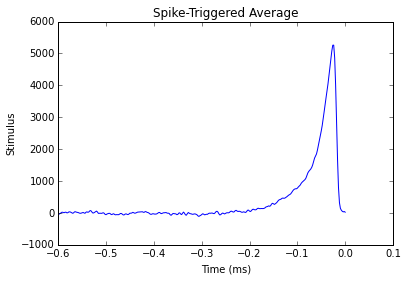

In [15]:
%config InteractiveShellApp.pylab_import_all = False #to prevent clobbering
%pylab inline 

#import numpy as np
#import matplotlib.pyplot as plt

import pickle

from compute_sta import compute_sta


FILENAME = 'c1p8.pickle'

with open(FILENAME, 'rb') as f:
    data = pickle.load(f)

stim = data['stim']
rho = data['rho']

sampling_period = 0.002 #500Hz
num_timesteps = 300

sta = compute_sta(stim, rho, num_timesteps)

time = (np.arange(-num_timesteps, 0) + 1) * sampling_period

plt.plot(time, sta)
plt.xlabel('Time (ms)')
plt.ylabel('Stimulus')
plt.title('Spike-Triggered Average')

plt.show()

In [14]:
def compute_sta(stim, rho, num_timesteps):
    sta = np.zeros((num_timesteps,))
    spike_times = rho[num_timesteps+1:].nonzero()[0] + num_timesteps
    num_spikes = sum([x==1 for x in rho])

    # To do this, compute the average of all of the vectors
    # starting 300 ms (exclusive) before a spike and ending at the time of
    # the event (inclusive). Each of these vectors defines a list of
    # samples that is contained within a window of 300 ms before each
    # spike. The average of these vectors should be completed in an
    # element-wise manner.
    #
    # Your code goes here.
    print 'num = ', num_spikes
    sta = np.zeros(num_timesteps)
    for spike_i in spike_times:
        stim_i = stim[spike_i-num_timesteps : spike_i]
        sta += stim_i

    sta /= num_timesteps
    return sta